<a href="https://colab.research.google.com/github/aholloman79/A-Primer-on-Scientific-Programming-with-Python/blob/master/Python_K_Nearest_Neighbors_(KNN)_for_Predicting_Shipping_Outcomes_in_a_Warehouse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

KNN (1 Neighbor) Confusion Matrix:
 [[1 0]
 [0 1]]
KNN (1 Neighbor) Accuracy: 100.00%

KNN (3 Neighbors) Confusion Matrix:
 [[1 0]
 [0 1]]
KNN (3 Neighbors) Accuracy: 100.00%


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


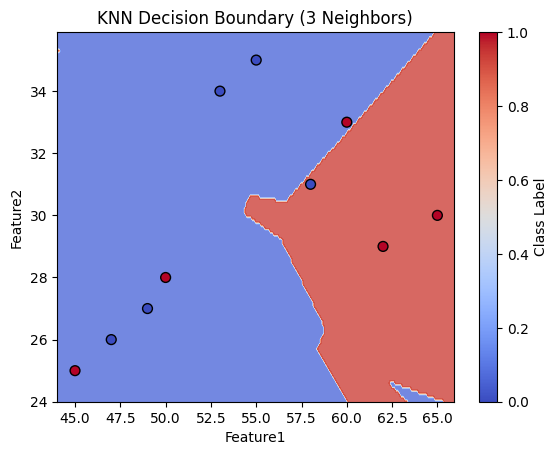

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler

# I want to create a simple dataset manually so that I can avoid any issues with loading external files in environments like Google Colab.
data = pd.DataFrame({
    'Feature1': [45, 55, 65, 50, 47, 53, 60, 58, 62, 49],
    'Feature2': [25, 35, 30, 28, 26, 34, 33, 31, 29, 27],
    'Outcome': [1, 0, 1, 1, 0, 0, 1, 0, 1, 0]  # 1 means "On Time" and 0 means "Late."
})

# I always like to split my data into training and testing sets so that I can evaluate the model's performance on unseen data.
X = data[['Feature1', 'Feature2']]
y = data['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing the data because KNN is sensitive to the scale of the features.
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# I start with a single nearest neighbor to see how the simplest KNN model performs.
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train_scaled, y_train)

# Making predictions with one neighbor.
y_pred_knn1 = knn.predict(X_test_scaled)
knn1_conf_matrix = confusion_matrix(y_test, y_pred_knn1)
knn1_accuracy = accuracy_score(y_test, y_pred_knn1)

print("KNN (1 Neighbor) Confusion Matrix:\n", knn1_conf_matrix)
print("KNN (1 Neighbor) Accuracy: {:.2f}%".format(knn1_accuracy * 100))

# I increase the number of neighbors to 3 to see if it improves the performance.
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_scaled, y_train)

# Making predictions with three neighbors.
y_pred_knn3 = knn.predict(X_test_scaled)
knn3_conf_matrix = confusion_matrix(y_test, y_pred_knn3)
knn3_accuracy = accuracy_score(y_test, y_pred_knn3)

print("\nKNN (3 Neighbors) Confusion Matrix:\n", knn3_conf_matrix)
print("KNN (3 Neighbors) Accuracy: {:.2f}%".format(knn3_accuracy * 100))

# Visualizing the decision boundary for the KNN classifier with 3 neighbors.
def plot_knn_decision_boundary(X, y, n_neighbors, title):
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train_scaled, y_train)

    x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
    y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

    Z = knn.predict(scaler.transform(np.c_[xx.ravel(), yy.ravel()]))
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.8, cmap='coolwarm')
    scatter = plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, edgecolor='k', s=50, cmap='coolwarm')
    plt.colorbar(scatter, label='Class Label')
    plt.title(title)
    plt.xlabel('Feature1')
    plt.ylabel('Feature2')
    plt.show()

# Plotting the decision boundary for KNN with 3 neighbors.
plot_knn_decision_boundary(X, y, n_neighbors=3, title="KNN Decision Boundary (3 Neighbors)")
